<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/Neural_Network_Regression/blob/main/Neural_Network_Regression2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
X_train = X[:40]
X_test = X[40:]
Y_train = Y[:40]
Y_test = Y[40:]
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

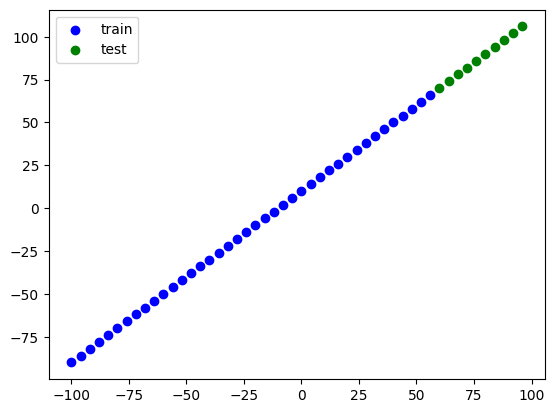

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, Y_train, c='b', label='train')
plt.scatter(X_test, Y_test, c='g', label='test')
plt.legend()

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae'])

In [ ]:
model.fit(tf.expand_dims(X_train,axis=-1), Y_train, epochs = 100, verbose=1)

Epoch 1/100
2/2 [==============================] - 3s 17ms/step - loss: 43.2330 - mae: 43.2330
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 31.2864 - mae: 31.2864
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 20.6404 - mae: 20.6404
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 12.1169 - mae: 12.1169
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 14.9009 - mae: 14.9009
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 14.3430 - mae: 14.3430
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 10.1523 - mae: 10.1523
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 5.6697 - mae: 5.6697
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 5.7358 - mae: 5.7358
Epoch 10/100
2/2 [==============================] - 0s 20ms/step - loss: 6.7440 - mae: 6.7440
Epoch 11/100
2/2 [==============================] - 0s 1

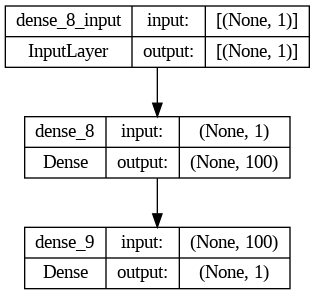

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [ ]:
model.predict([10])

1/1 [==============================] - 0s 125ms/step


array([[20.114067]], dtype=float32)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 44ms/step


array([[ 70.31692 ],
       [ 74.37621 ],
       [ 78.4355  ],
       [ 82.4948  ],
       [ 86.554085],
       [ 90.61338 ],
       [ 94.67267 ],
       [ 98.731964],
       [102.791245],
       [106.85054 ]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
def predictions(
    train_data = X_train,
    train_labels = Y_train,
    test_data = X_test,
    test_labels = Y_test,
    predictions = y_pred):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', label = "Training Data")
  plt.scatter(test_data, test_labels, c='g', label = "Testing Data")
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  plt.legend()

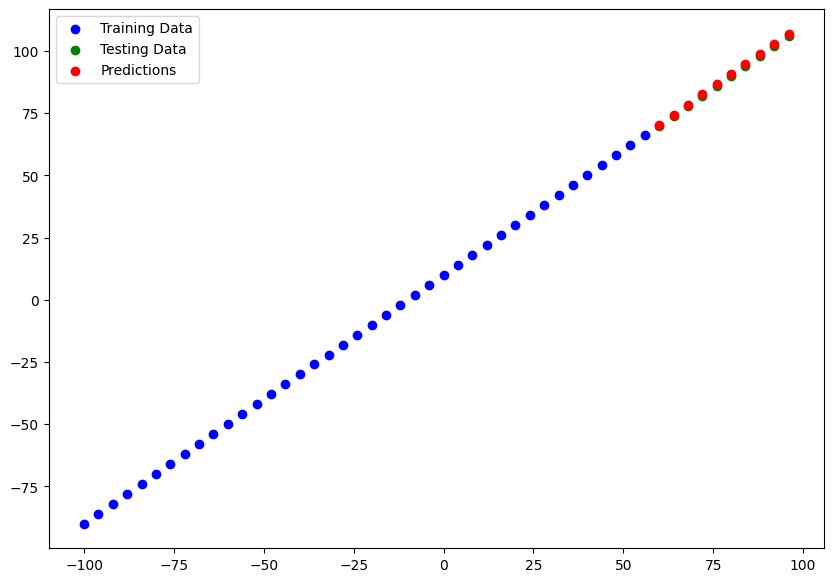

In [ ]:
predictions()

In [ ]:
mae = tf.metrics.mean_absolute_error(Y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.746466, 14.574272, 12.2258  , 10.70104 , 10.      , 10.122676,
       11.069067, 12.839178, 15.432996, 18.85054 ], dtype=float32)>

In [ ]:
tf.constant(y_pred)
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.31692 ,  74.37621 ,  78.4355  ,  82.4948  ,  86.554085,
        90.61338 ,  94.67267 ,  98.731964, 102.791245, 106.85054 ],
      dtype=float32)>

In [ ]:
#MAE
mae = tf.metrics.mean_absolute_error(Y_test, tf.squeeze(y_pred))
mae
#Dimensions should be the same

<tf.Tensor: shape=(), dtype=float32, numpy=0.58373106>

In [ ]:
mse = tf.metrics.mean_squared_error(Y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.3697444>

In [ ]:
huber_loss = tf.keras.losses.Huber()
loss_value = huber_loss(Y_test, tf.squeeze(y_pred))
loss_value

<tf.Tensor: shape=(), dtype=float32, numpy=0.1848722>

# **Modelling Experiments**
**Model 1**: 1 layer trained for 100 epochs

**Model 2**: 2 layers trained for 100 epochs

**Model 3**: 2 layers trained for 500 epochs


In [ ]:
#Saving a tf model
'''
Create and train a new model instance like:
model = create model()
model.fit(train_images, train_labels, epochs=5)

Saving is like
!mkdir -p saved_model
model.save('saved_model/my_model')
'''

#HDF5 Standard
#model.save('my_model.h5')